# Titanic - Machine Learning from Disaster

Name: Elad Shoham

ID: 206001752

Kaggle: https://www.kaggle.com/eladshoham

# About the competition

The sinking of the Titanic is one of the most infamous shipwrecks in history.​On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this competiton, I built a predictive model that answers the question: “what sorts of people were more likely to survive?”, by using passenger data (ie name, age, gender, socio-economic class, etc).

We will perform several experiments on different models with different divisions of data to find the model that will bring the highest accuracy and the lowest cross entropy loss.

# Imports and Definitions

In [1]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tqdm.auto import tqdm
from scipy.stats import uniform

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neural_network
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import LeavePOut
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# Data Investigation and Preprocessing

In [2]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
submission_passengers_id = test['PassengerId']
display(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Data Dictionary**

| Variable | Definition | Key |
| :-: | :-: | :-: |
| survival | Survival | 0 = No, 1 = Yes
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
| sex | Sex | 
| Age | Age in years | 
| sibsp | # of siblings / spouses aboard the Titanic | 
| parch | # of parents / children aboard the Titanic | 
| ticket | 	Ticket number | 
| fare | Passenger fare | 
| cabin | Cabin number | 
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
# describe train data on numerical features
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# describe train data on categorical features
train.describe(include=['O']) 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


**Preprocessing on train data**

In the first step we will drop the features PassengerId, Name and Ticket because they are not necessary for the prediction.

In [5]:
# drop unnecessary features such as PassengerId, Name and Ticket from train
train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
display(train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [6]:
# count empty values in each column
def count_empty_values_in_each_column(df: pd.DataFrame):
  print('empty values')
  print('------------\n')

  for col in df.columns:
    print(f"{col}: {df[col].isna().sum()}")

In [7]:
# check if there is missing data in train data
count_empty_values_in_each_column(train)

empty values
------------

Survived: 0
Pclass: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Fare: 0
Cabin: 687
Embarked: 2


In [8]:
# fill empty values in the dataframe by the median of the column
def fill_na_median(df, column_name):
  df_not_null = df[~df[column_name].isnull()]
  df[column_name].fillna(df_not_null[column_name].median(), inplace=True)

# fill empty values in the dataframe by random value from the column
def fill_na_random_pick_column_distribution(df, column_name):
  df_not_null = df[~df[column_name].isnull()]
  df_null = df[df[column_name].isnull()]
  options = np.random.choice(df_not_null[column_name])
  df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)

In [9]:
# completion of missing values in train
fill_na_median(train, 'Age')
fill_na_random_pick_column_distribution(train, 'Cabin')
fill_na_random_pick_column_distribution(train, 'Embarked')
display(train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,B20,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,C22 C26,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,B5,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,D20,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,28.0,1,2,23.4500,B22,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [10]:
# checking if all the missing data in train is now completed
count_empty_values_in_each_column(train)

empty values
------------

Survived: 0
Pclass: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 0
Cabin: 0
Embarked: 0


In [11]:
# using LabelEncoder from sklearn to change Cabin and Embarked to numbers depanding their lables
lb = sklearn.preprocessing.LabelEncoder()
train['Cabin'] = lb.fit_transform(train['Cabin'])
train['Embarked'] = lb.fit_transform(train['Embarked'])

# using OneHotEncoder from sklearn to change Sex to 0/1 values.
enc = OneHotEncoder(sparse=False, drop='first')
train_cat = train[['Sex']]
train_cat_enc = pd.DataFrame(enc.fit_transform(train_cat), columns=enc.get_feature_names())
train = train.drop(['Sex'], axis=1).join(train_cat_enc) # remove Sex column and concations the encoding column
display(train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,x0_male
0,0,3,22.0,1,0,7.2500,19,2,1.0
1,1,1,38.0,1,0,71.2833,81,0,0.0
2,1,3,26.0,0,0,7.9250,62,2,0.0
3,1,1,35.0,1,0,53.1000,55,2,0.0
4,0,3,35.0,0,0,8.0500,32,2,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,96,2,1.0
887,1,1,19.0,0,0,30.0000,30,2,0.0
888,0,3,28.0,1,2,23.4500,20,2,0.0
889,1,1,26.0,0,0,30.0000,60,0,1.0


**Preprocessing on test data**

In [12]:
# drop unnecessary features such as PassengerId, Name and Ticket from test
test = test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
display(test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


In [13]:
# check if there is missing data in test data
count_empty_values_in_each_column(test)

empty values
------------

Pclass: 0
Sex: 0
Age: 86
SibSp: 0
Parch: 0
Fare: 1
Cabin: 327
Embarked: 0


In [14]:
# completion of missing values in test
fill_na_median(test, 'Age')
fill_na_median(test, 'Fare')
fill_na_random_pick_column_distribution(test, 'Cabin')
display(test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,C105,Q
1,3,female,47.0,1,0,7.0000,B51 B53 B55,S
2,2,male,62.0,0,0,9.6875,D,Q
3,3,male,27.0,0,0,8.6625,D37,S
4,3,female,22.0,1,1,12.2875,D28,S
...,...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,A9,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,E60,S
416,3,male,27.0,0,0,8.0500,C32,S


In [15]:
# checking if all the missing data in test is now completed
count_empty_values_in_each_column(test)

empty values
------------

Pclass: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 0
Cabin: 0
Embarked: 0


In [16]:
# using LabelEncoder from sklearn to change Cabin and Embarked to numbers depanding their lables
test['Cabin'] = lb.fit_transform(test['Cabin'])
test['Embarked'] = lb.fit_transform(test['Embarked'])

# using OneHotEncoder from sklearn to change Sex to 0/1 values.
enc = OneHotEncoder(sparse=False, drop='first')
test_cat = test[['Sex']]
test_cat_enc = pd.DataFrame(enc.fit_transform(test_cat), columns=enc.get_feature_names())
test = test.drop(['Sex'], axis=1).join(test_cat_enc) # remove Sex column and concations the encoding column
display(test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,x0_male
0,3,34.5,0,0,7.8292,22,1,1.0
1,3,47.0,1,0,7.0000,13,2,0.0
2,2,62.0,0,0,9.6875,47,1,1.0
3,3,27.0,0,0,8.6625,56,2,1.0
4,3,22.0,1,1,12.2875,53,2,0.0
...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,5,2,1.0
414,1,39.0,0,0,108.9000,22,0,0.0
415,3,38.5,0,0,7.2500,67,2,1.0
416,3,27.0,0,0,8.0500,31,2,1.0


# Features Engineering

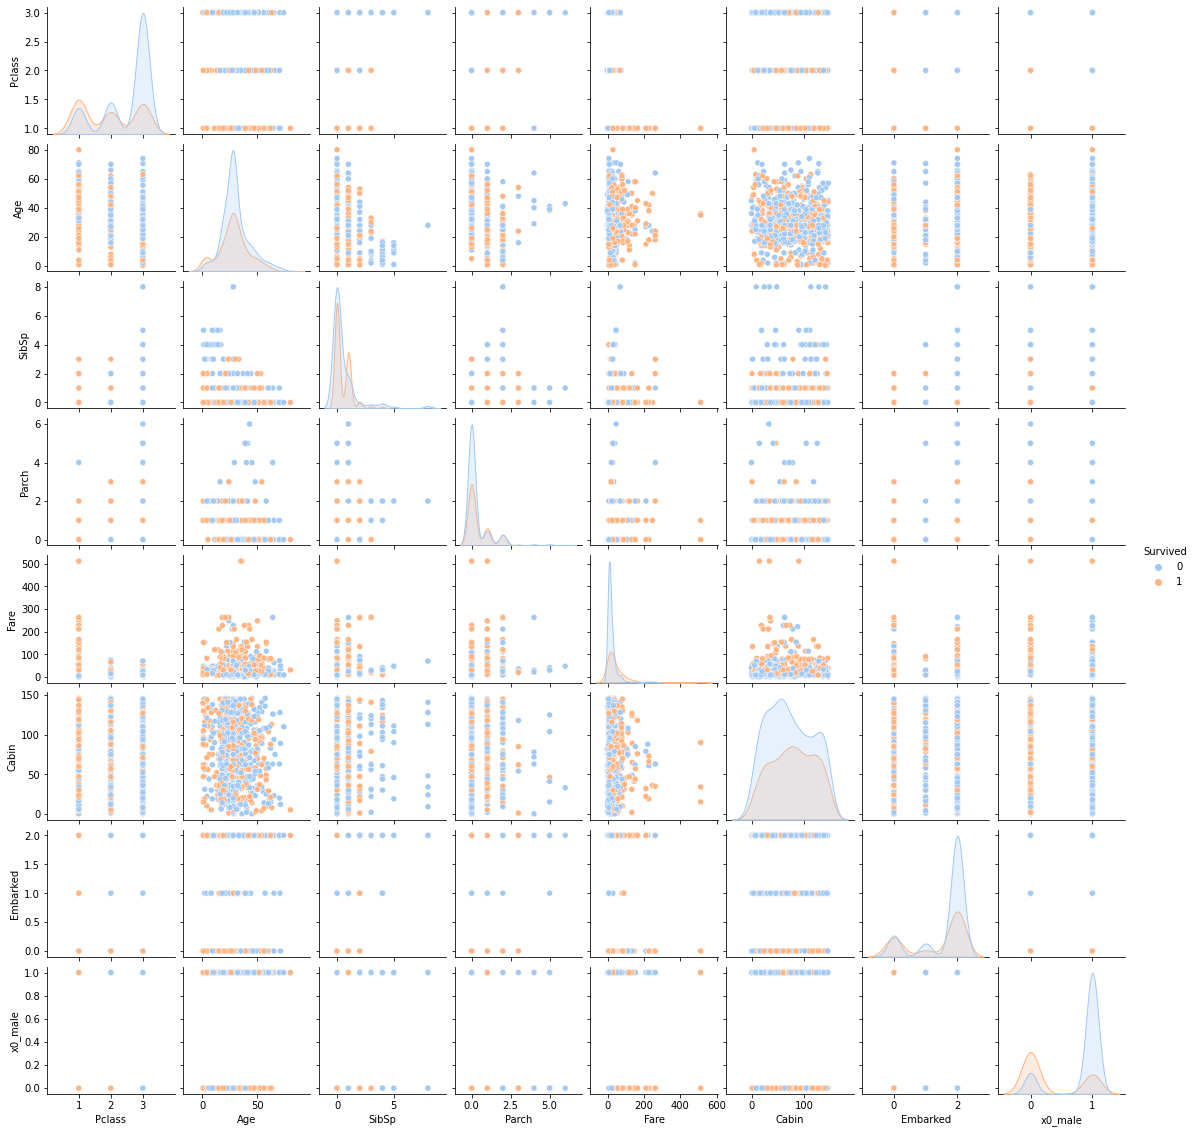

In [17]:
# show pairplot of the features
sns.pairplot(data=train, hue='Survived', palette='pastel', height=2)

It can be seen in Pclass that most of those who were in class 1 survived, so there is a connection between the class and the chance to survived, the better the class rank, the higher the chance. In addition it can be seen that most of those who survived were in the age range of 20 to 40.

In [18]:
# show absolute correlation between features in a heatmap
def show_heatmap(data):
  plt.figure(figsize=(18,10))
  cor = np.abs(data.corr())
  sns.heatmap(cor, annot=True, cmap=plt.cm.Blues, vmin=-1, vmax=1)
  plt.show()

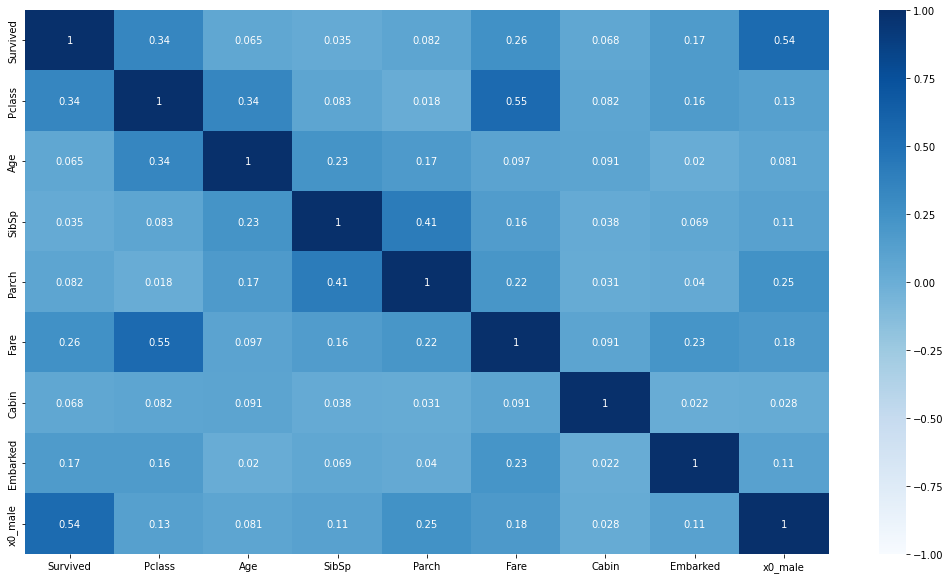

In [19]:
# showing heatmap of the train data
show_heatmap(train)

**Create new feature**

Let's try to create a new feature that indicates whether the person is alone, we call this feature IsAlone and set the value 1 if SibSp + Parch = 0 else we set the value 0, i.e. 1 indicates that he is alone, 0 indicates that he is not alone.

In [20]:
train_cp = train.copy()
train_cp.insert(len(train.columns), 'IsAlone', 0)
train_cp.loc[train_cp['SibSp'] + train_cp['Parch'] == 0, 'IsAlone'] = 1

In [21]:
test_cp = test.copy()
test_cp.insert(len(test.columns), 'IsAlone', 0)
test_cp.loc[test_cp['SibSp'] + test_cp['Parch'] == 0, 'IsAlone'] = 1

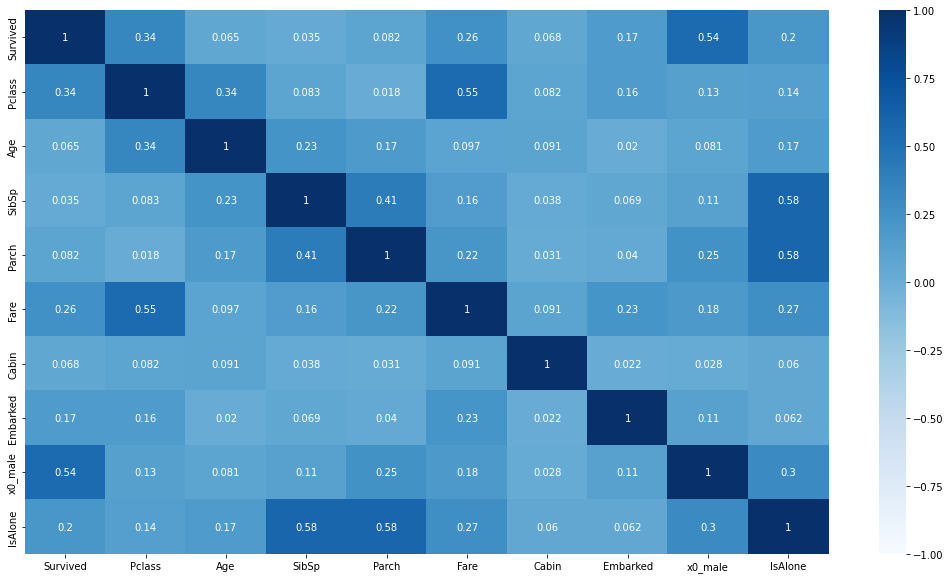

In [22]:
# showing heatmap of the train_cp data
show_heatmap(train_cp)

# Data Slicing

In [23]:
# print 4 graphs: ce of train/test and r2 of train/test
def print_graphs_r2_ce(graph_points):
  for k, v in graph_points.items():
    best_value = max(v.values()) if 'R2' in k else min(v.values())
    best_index = np.argmax(list(v.values())) if 'R2' in k else np.argmin(list(v.values()))
    color = 'r' if 'train' in k else 'b'
    plt.rcParams["figure.figsize"] = (16, 8)
    plt.plot(list(v.keys()), list(v.values()), color)
    plt.grid()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'{k}, best value: x={best_index + 1}, y={best_value}', fontsize=20)
    plt.show()

In [24]:
# plot the score by split and the loss by split for SGD
def plot_score_and_loss_by_split_SGD(x, t):
  graph_points = { 'train_CE': {}, 'val_CE': {}, 'train_R2': {}, 'val_R2': {} }

  for size in range(10, 100, 10):
    x_train, x_val, t_train, t_val = model_selection.train_test_split(x, t, test_size=size/100, random_state=42)
    SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(x_train, t_train)
    y_train_prob = SGD_cls.predict_proba(x_train)
    y_test_prob = SGD_cls.predict_proba(x_val)
    y_train = SGD_cls.predict(x_train)
    y_val = SGD_cls.predict(x_val)
    graph_points['train_CE'][size/100] = metrics.log_loss(t_train, y_train_prob)
    graph_points['val_CE'][size/100] = metrics.log_loss(t_val, y_test_prob)
    graph_points['train_R2'][size/100] = SGD_cls.score(x_train, t_train)
    graph_points['val_R2'][size/100] = SGD_cls.score(x_val, t_val)
  print_graphs_r2_ce(graph_points)

In [25]:
# plot the score by split and the loss by split for MLP
def plot_score_and_loss_by_split_MLP(x, t):
  graph_points = { 'train_CE': {}, 'val_CE': {}, 'train_R2': {}, 'val_R2': {} }

  for size in range(10, 100, 10):
    x_train, x_val, t_train, t_val = model_selection.train_test_split(x, t, test_size=size/100, random_state=42)
    MLP_cls = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=40000).fit(x_train, t_train)
    y_train_prob = MLP_cls.predict_proba(x_train)
    y_test_prob = MLP_cls.predict_proba(x_val)
    graph_points['train_CE'][size/100] = metrics.log_loss(t_train, y_train_prob)
    graph_points['val_CE'][size/100] = metrics.log_loss(t_val, y_test_prob)
    graph_points['train_R2'][size/100] = MLP_cls.score(x_train, t_train)
    graph_points['val_R2'][size/100] = MLP_cls.score(x_val, t_val)
  print_graphs_r2_ce(graph_points)

**Regular Train Data**

In [26]:
# divide the data to features and target
t = train['Survived'].copy()
X = train.drop(['Survived'], axis=1)
print('t')
display(t)
print()
print('X')
display(X)

t


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


X


,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,x0_male
0,3,22.0,1,0,7.2500,19,2,1.0
1,1,38.0,1,0,71.2833,81,0,0.0
2,3,26.0,0,0,7.9250,62,2,0.0
3,1,35.0,1,0,53.1000,55,2,0.0
4,3,35.0,0,0,8.0500,32,2,1.0
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,96,2,1.0
887,1,19.0,0,0,30.0000,30,2,0.0
888,3,28.0,1,2,23.4500,20,2,0.0
889,1,26.0,0,0,30.0000,60,0,1.0


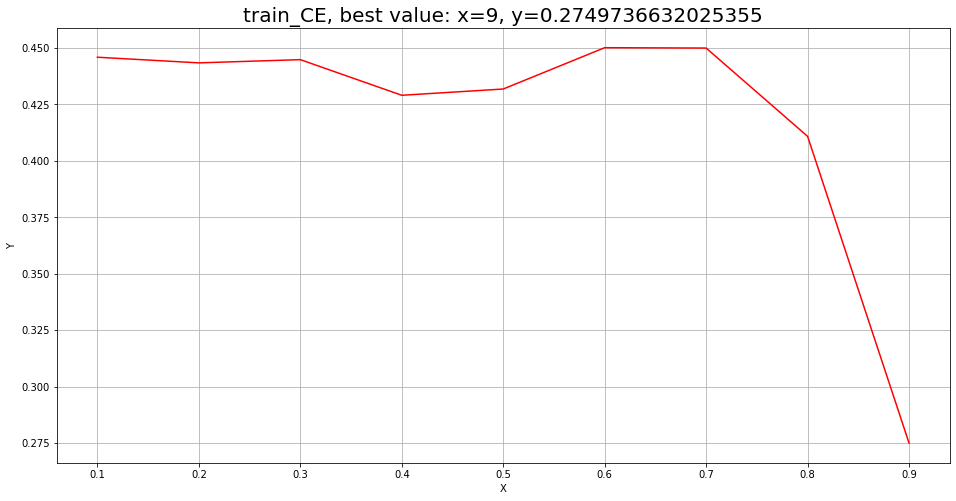

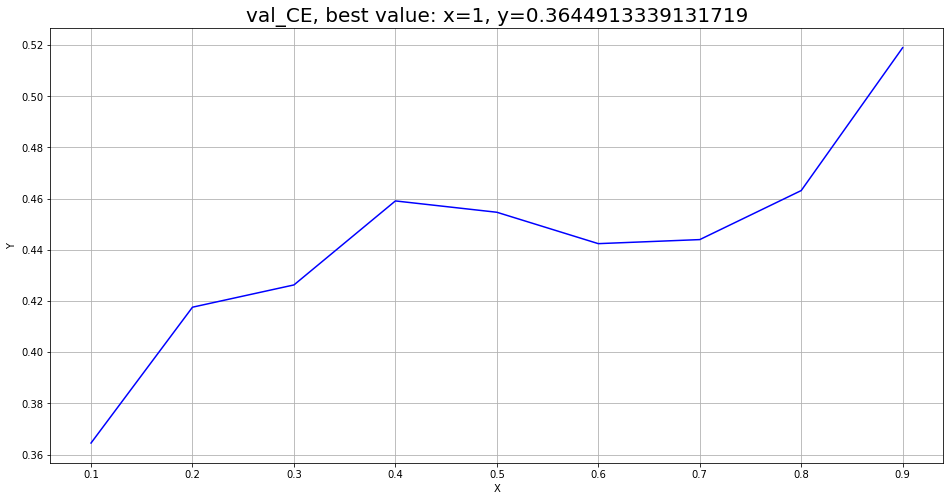

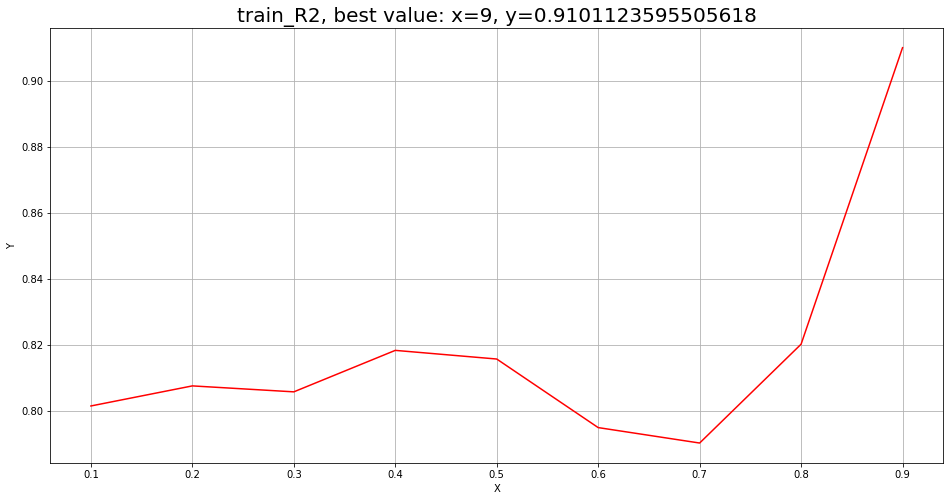

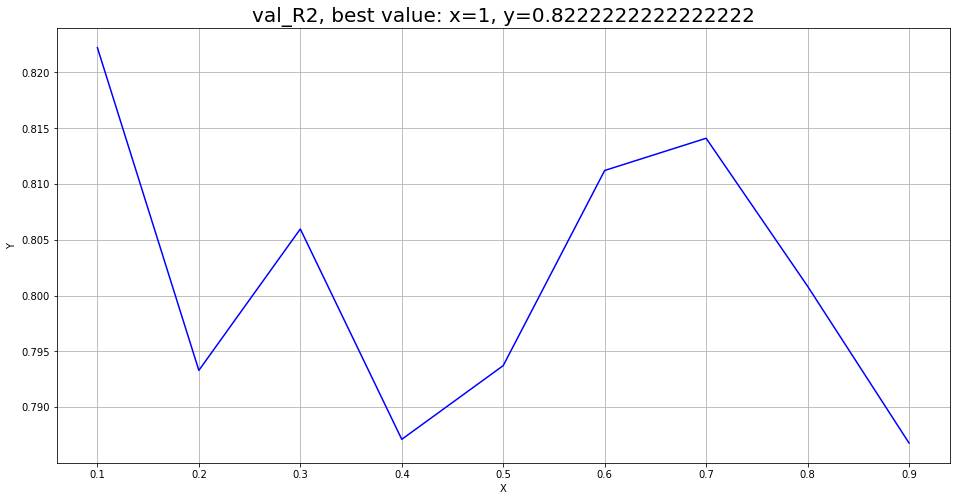

In [27]:
# plot the train on SGD model be different slicing of the data
plot_score_and_loss_by_split_SGD(X, t)

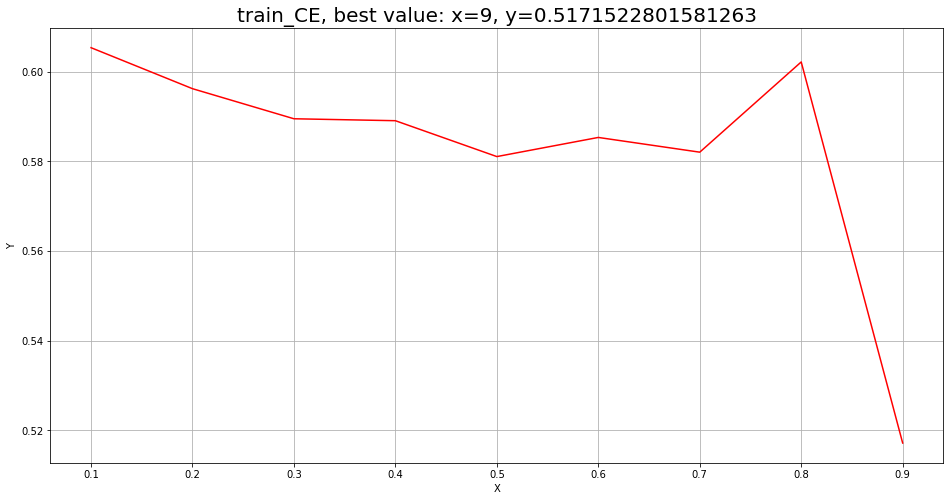

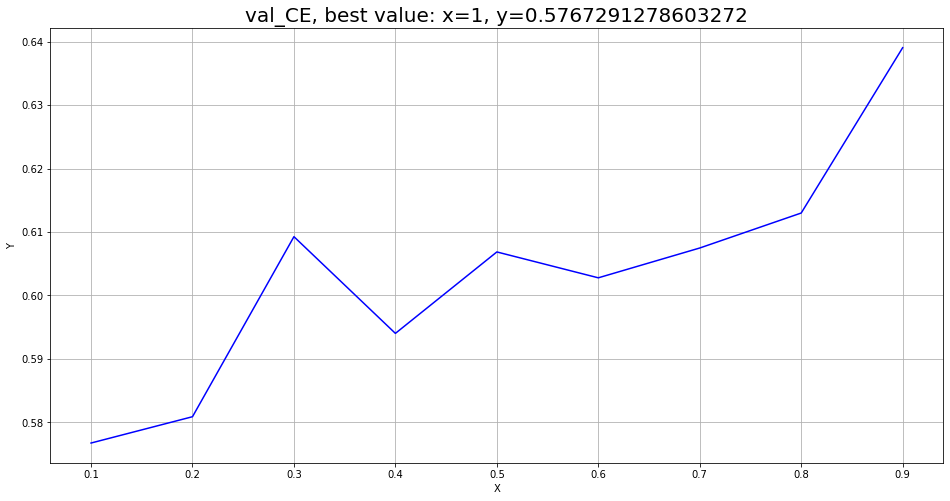

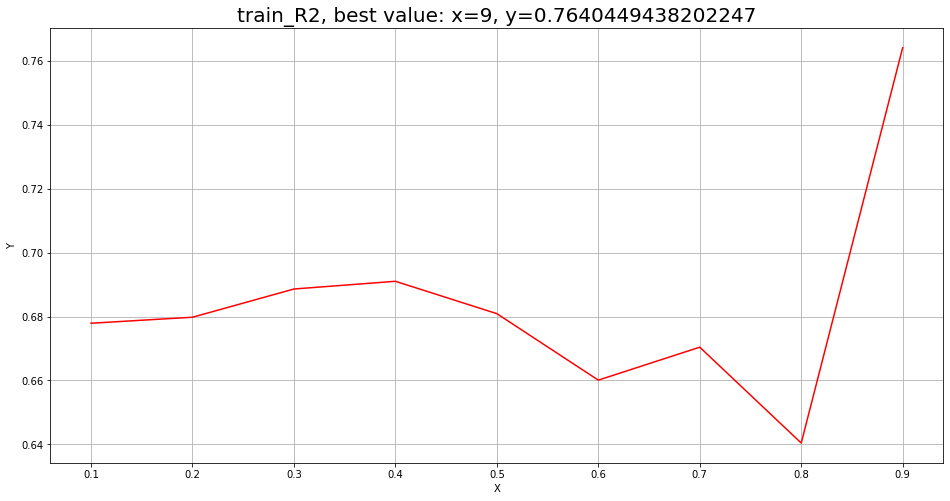

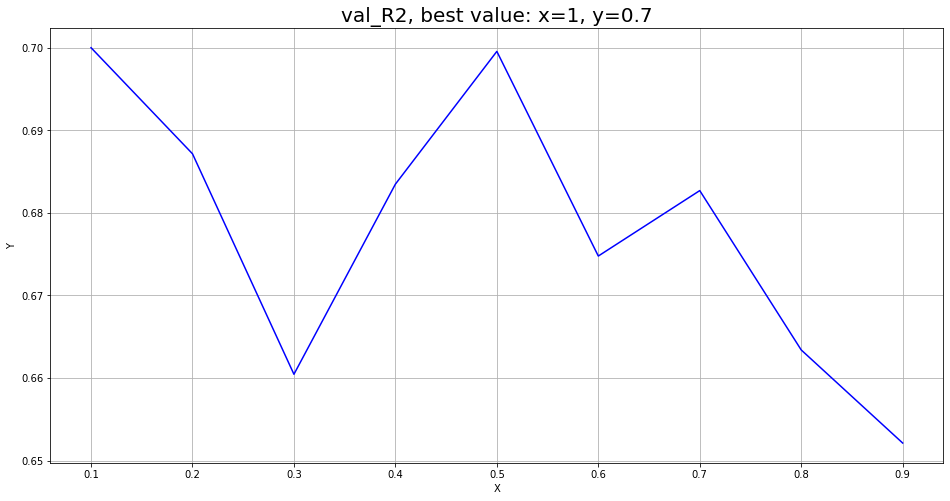

In [28]:
# plot the train on MLP model be different slicing of the data
plot_score_and_loss_by_split_MLP(X, t)

Train Copy Data (with IsAlone feature)

In [29]:
# divide the train_cp data to features and target
t_cp = train_cp['Survived'].copy()
X_cp = train_cp.drop(['Survived'], axis=1)
print('t')
display(t_cp)
print()
print('X')
display(X_cp)

t


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


X


,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,x0_male,IsAlone
0,3,22.0,1,0,7.2500,19,2,1.0,0
1,1,38.0,1,0,71.2833,81,0,0.0,0
2,3,26.0,0,0,7.9250,62,2,0.0,1
3,1,35.0,1,0,53.1000,55,2,0.0,0
4,3,35.0,0,0,8.0500,32,2,1.0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,96,2,1.0,1
887,1,19.0,0,0,30.0000,30,2,0.0,1
888,3,28.0,1,2,23.4500,20,2,0.0,0
889,1,26.0,0,0,30.0000,60,0,1.0,1


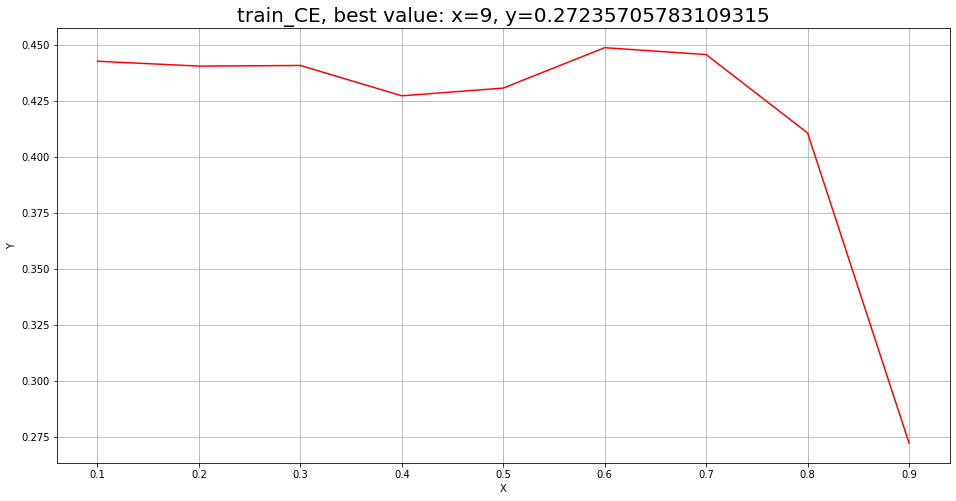

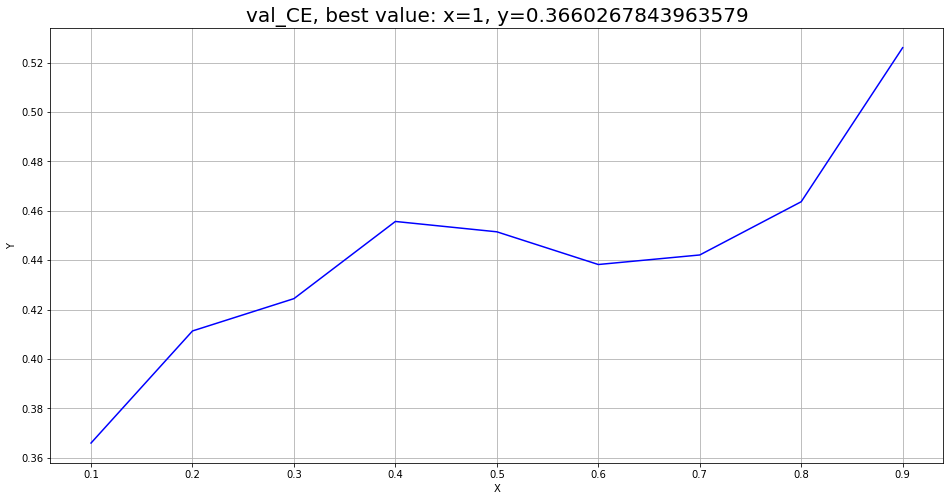

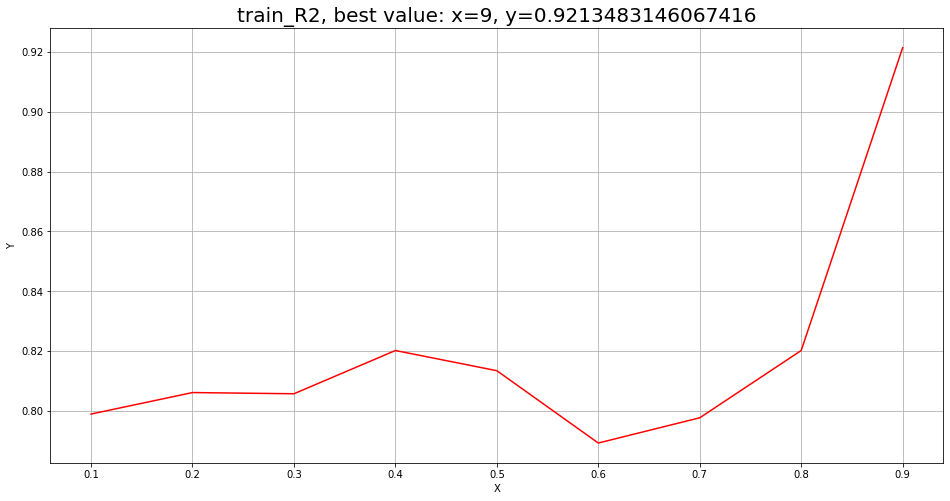

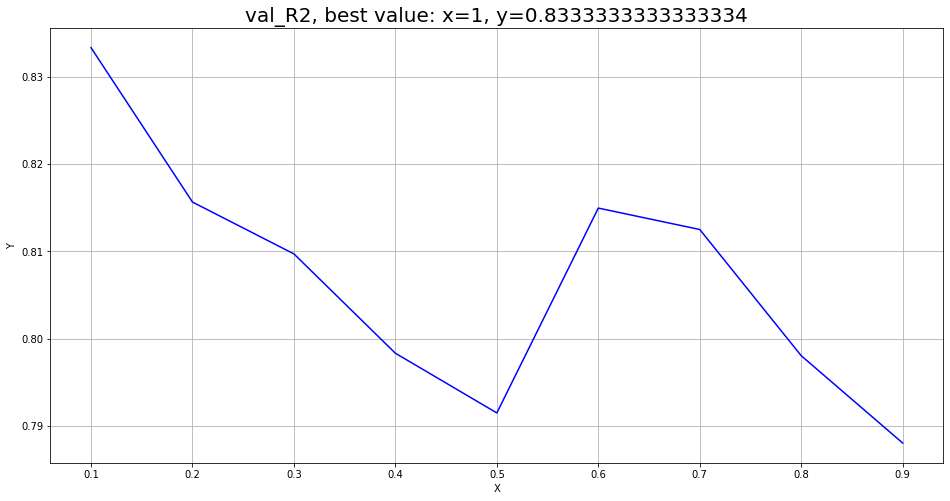

In [30]:
# plot the train_cp on SGD model be different slicing of the data
plot_score_and_loss_by_split_SGD(X_cp, t_cp)

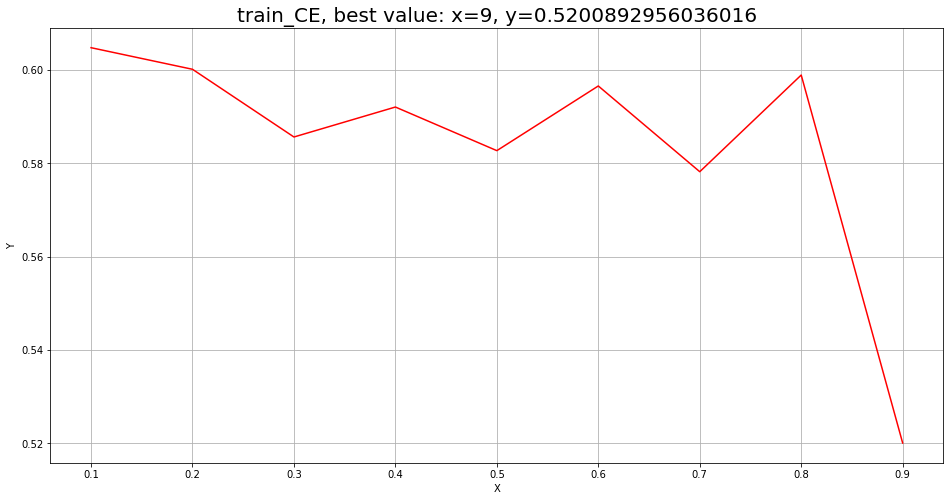

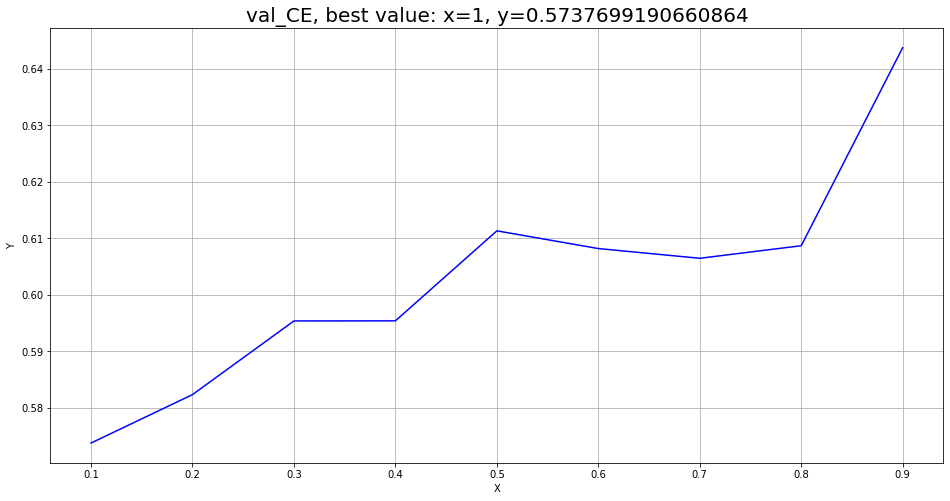

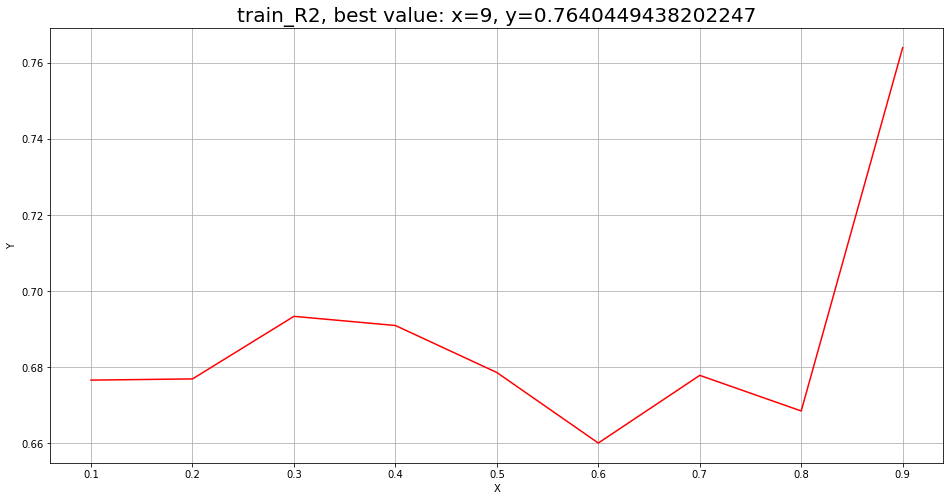

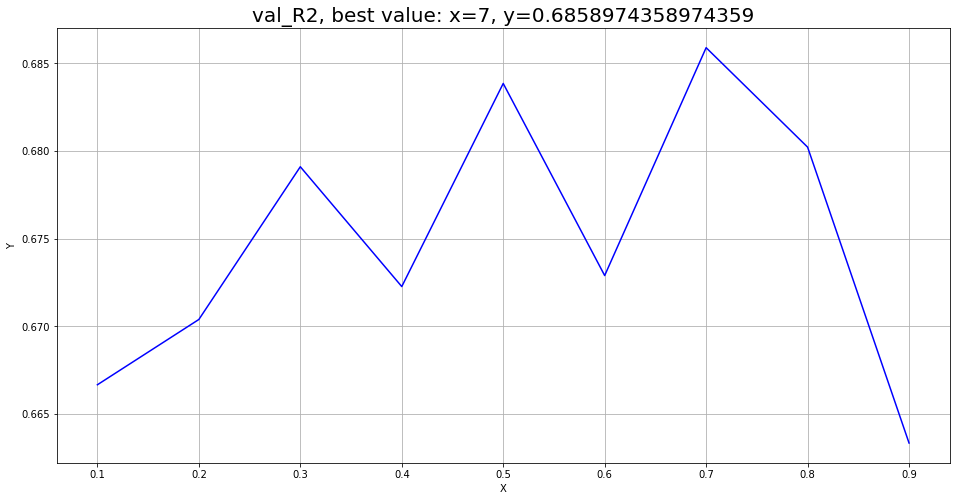

In [31]:
# plot the train_cp on MLP model be different slicing of the data
plot_score_and_loss_by_split_MLP(X_cp, t_cp)

**Results**

It can be seen that the SGDClassifier model gives better results than MLP in all cases.

We can see in both the regular train data and in the copy train data(with IsAlone) that from 0.1 to 0.7, the validtion loss is smaller than the train loss, and from 0.75 to 0.9 the train loss is smaller than the validtion loss, in addition we can see that the cross entropy of copy train data is slightly lower than the regular. thus we choose to divide the copy train data to 75% train and 25% validtion to get the best model.

# Test Classification

In [32]:
# split the train data to 75% train and 25% validation
x_train, x_val, t_train, t_val = model_selection.train_test_split(X_cp, t, test_size=0.25, random_state=42)

In [33]:
# create the SGDClassifier and predict the probabilities of the train and test data
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(x_train, t_train)
y_train_prob = SGD_cls.predict_proba(x_train)
y_test_prob = SGD_cls.predict_proba(x_val)
y_train = SGD_cls.predict(x_train)
y_test = SGD_cls.predict(x_val)

# print the accuracy score and CE loss of the train and test
print('Accuracy score on train', SGD_cls.score(x_train, t_train))
print('Accuracy score on test', SGD_cls.score(x_val, t_val))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_val, y_test_prob))

Accuracy score on train 0.8098802395209581
Accuracy score on test 0.8161434977578476

CE on train 0.44059947211258255
CE on test 0.41819234012767104


In [34]:
# predict the test with SGDClassifier
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_cp, t)
submission_preds = SGD_cls.predict(test_cp)

In [35]:
# create the submission file
submission = pd.DataFrame({
        'PassengerId': submission_passengers_id,
        'Survived': submission_preds
    })
submission.to_csv('submission.csv', index=False)
display(submission)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Submissions and Leaderboard

**My Submissions**
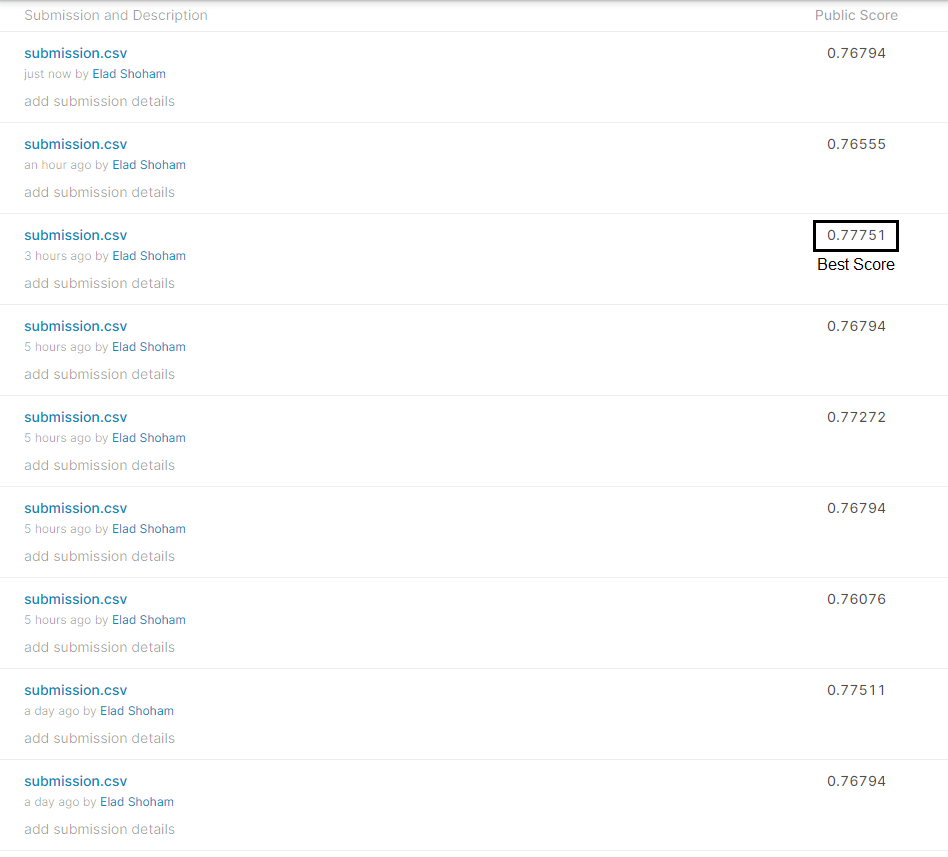

**Leaderboard**
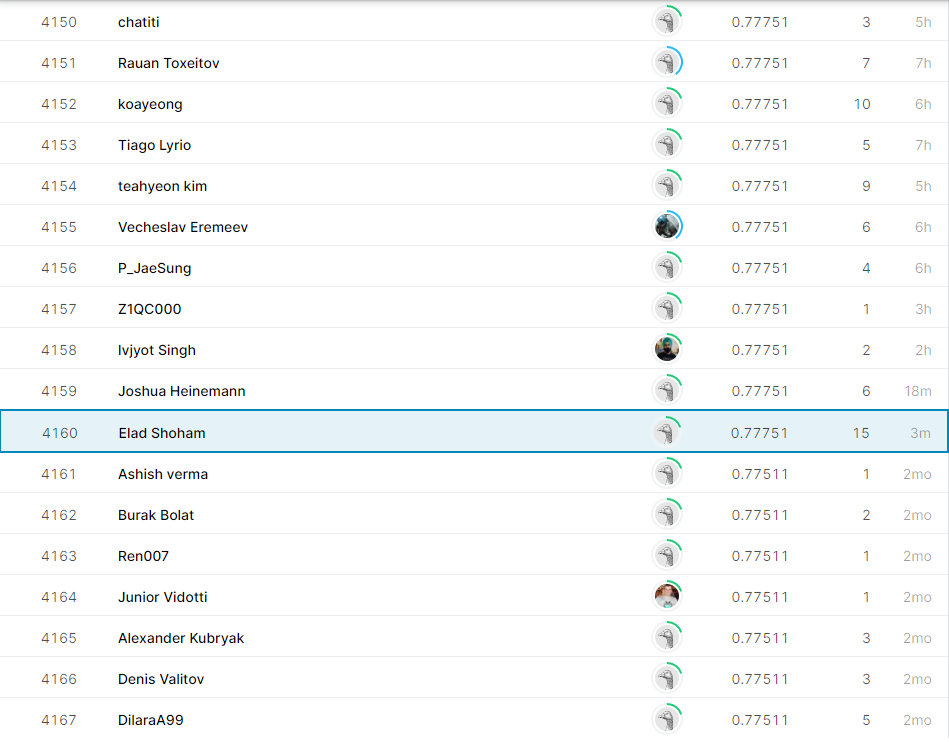

# Conclusions

After researching and analyzing the data I performed several experiments on 2 different data types. Both of the data I ran on 2 different models SGDClassifier and MLP. 
In each experiment the data were divided differently into train data and validtion to test which spliting would be best for the models, after the experiment we came to conclusion that the best data to use is the copy data (with the IsAlone feature) with the division of 75% train and 25% validtion for the SGDClassifier model.

# References

sklrean Regression - https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

for read the data - https://www.kaggle.com/jlawman/complete-beginner-your-first-titanic-submission

# Exercise 3

# Cross Validation

In [36]:
# find generator length
def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [37]:
# calculate precision, recall, specificity, fpr and accuracy
def precision(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fp)

def recall(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fn)

def specificity(cm):
    tn, fp, fn, tp = cm.ravel()
    return tn/(tn+fp)

def fpr(cm):
    tn, fp, fn, tp = cm.ravel()
    return fp/(fp+tn)

def accuracy(cm):
    tn, fp, fn, tp = cm.ravel()
    return (tp+tn)/(tp+tn+fp+fn)

# calculate f1 and balanced accuracy
def f1(cm):
    precision_calc = precision(cm)
    recall_calc = recall(cm)
    return (2*precision_calc*recall_calc)/(precision_calc+recall_calc)

def balanced_accuracy(cm):
    recall_calc = recall(cm)
    specificity_calc = specificity(cm)
    return (recall_calc+specificity_calc)/2

def calc_metrics(cm):
  return {
      'precision': precision(cm),
      'recall': recall(cm),
      'specificity': specificity(cm),
      'fpr': fpr(cm),
      'accuracy': accuracy(cm),
      'f1': f1(cm),
      'balanced accuracy': balanced_accuracy(cm),
  }

In [79]:
# print all metrics from confusion_matrix for train and validation
def print_confusion_matrix(model, cm_train, cm_val):
  cm_train_df = pd.DataFrame(cm_train, index=['actual_0', 'actual_1'], columns=['predicted_0', 'predicted_1'])
  cm_val_df = pd.DataFrame(cm_val, index=['actual_0', 'actual_1'], columns=['predicted_0', 'predicted_1'])

  print('Confusion Matrix')
  fig, ax = plt.subplots(ncols=2, figsize=(10,3))
  for i, (df, title) in enumerate(zip([cm_train_df, cm_val_df], ['Train', 'Validation'])):
    fig = sns.heatmap(df, annot=True, ax=ax[i], cmap=plt.cm.Pastel1, fmt='g')
    fig.set_title(title)
  plt.subplots_adjust(top=1.5, bottom=0, left=0, right=1)
  plt.show()

  display(pd.DataFrame({ 'Tarin': calc_metrics(cm_train), 'Validation': calc_metrics(cm_val) }))

In [77]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
  scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

  if k is not None:
    cv = KFold(n_splits=k, shuffle=True, random_state=2)
  elif p is not None:
    cv = LeavePOut(p)
  else:
    raise ValueError("Must specify either `K` or `P`.")

  if use_pbar:
    pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

  for i, (train_ids, val_ids) in enumerate(cv.split(X)):
    X_train = X.loc[train_ids]
    t_train = t.loc[train_ids]
    X_val = X.loc[val_ids]
    t_val = t.loc[val_ids]

    model.fit(X_train, t_train)

    y_train = model.predict_proba(X_train)
    y_val = model.predict_proba(X_val)

    scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), metrics.log_loss(t_train, y_train)]
    scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), metrics.log_loss(t_val, y_val)]

    if use_pbar:
      pbar.update()

  if use_pbar:
    pbar.close()

  val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
  train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

  mean_val_score = val_scores_losses_df['score'].mean()
  mean_val_loss = val_scores_losses_df['loss'].mean()
  mean_train_score = train_scores_losses_df['score'].mean()
  mean_train_loss = train_scores_losses_df['loss'].mean()
  cm_train = confusion_matrix(t_train, model.predict(X_train))
  cm_val = confusion_matrix(t_val, model.predict(X_val))

  if show_score_loss_graphs:
    fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Validation Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
    fig.show()
    fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Validation Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
    fig.show()
    print_confusion_matrix(model, cm_train, cm_val)

  return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

# Data Encoding

We will take X_cp with the new feature IsAlone because It showed better accuracy at first so it may help predictions in this part more than the regular X.

In [40]:
# determine categorical and numerical features
numerical_cols = X_cp.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_cp.select_dtypes(include=['object', 'bool']).columns
all_cols = list(categorical_cols) + list(numerical_cols)

print('Numerical Cols:', numerical_cols)
print('Categorical Cols:', categorical_cols)
print('All Cols:', all_cols)

Numerical Cols: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'x0_male', 'IsAlone'],
      dtype='object')
Categorical Cols: Index([], dtype='object')
All Cols: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'x0_male', 'IsAlone']


In [41]:
# use column transformer to use StandardScaler for numerical columns
ct_std = ColumnTransformer([("standard", StandardScaler(), numerical_cols)])
X_encoded = pd.DataFrame(ct_std.fit_transform(X_cp, t), columns=all_cols)

# Feature Selection

In [42]:
# find best subset of features on this dataset
selector = RFECV(SGDClassifier(loss='log', random_state=1), cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)).fit(X_encoded, t)
X_selected_features = X_encoded.loc[:, selector.support_]
display(X_selected_features)

fig = go.Figure()
results = selector.cv_results_['mean_test_score'] # Getting the mean cv score for each set of features
fig.add_trace(go.Scatter(x=[i for i in range(1, len(results) + 1)], y=results))
fig.update_xaxes(title_text="Number of features selected")
fig.update_yaxes(title_text="Cross validation score (nb of correct classifications)")
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but RFECV was fitted with feature names



,Pclass,Age,SibSp,Parch,Fare,x0_male
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.737695
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,-1.355574
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,-1.355574
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,-1.355574
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.737695
...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,0.737695
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,-1.355574
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,-1.355574
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,0.737695


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

Confusion Matrix


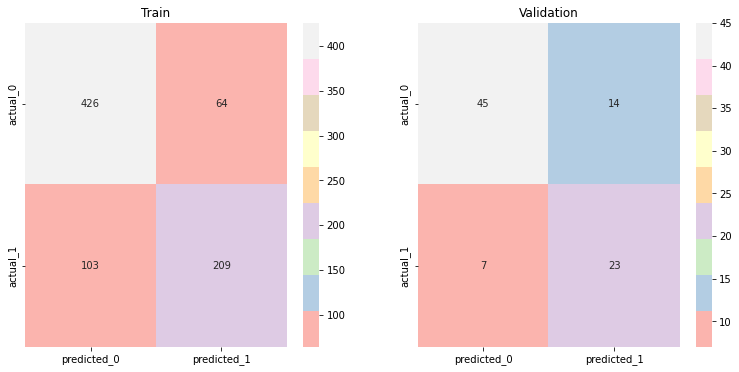

,Tarin,Validation
precision,0.765568,0.621622
recall,0.669872,0.766667
specificity,0.869388,0.762712
fpr,0.130612,0.237288
accuracy,0.791771,0.764045
f1,0.714530,0.686567
balanced accuracy,0.769630,0.764689


mean cv val score: 0.78
mean cv val loss 0.52
mean cv val score: 0.78
mean cv val loss 0.51


In [80]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features, t, SGDClassifier(loss='log', random_state=1), k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

# Hyper-Parameters Search

**Grid Search**

In [83]:
# train with grid search and get best parameters
hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'), 'alpha':[0.0001, 0.001, 0.01, 0.1]}

gs_model = GridSearchCV(SGDClassifier(random_state=1), hyper_parameters).fit(X_selected_features, t)
print('Accuracy score for classification:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)

Accuracy score for classification:
gs_model 0.7889900194589166
best params {'alpha': 0.001, 'penalty': 'elasticnet'}


**Random Search**

In [82]:
# train with random search and get best parameters
np.random.seed(1)
distributions = dict(alpha=uniform(loc=0, scale=1), penalty=['l2', 'l1', 'elasticnet'])

rs_model = RandomizedSearchCV(SGDClassifier(), distributions, random_state=1).fit(X_selected_features, t)
print('Accuracy score for classification:')
print('rs_model', rs_model.best_score_)
print('best params', rs_model.best_params_)

Accuracy score for classification:
rs_model 0.7867491055175444
best params {'alpha': 0.417022004702574, 'penalty': 'l2'}


We can see that the Grid Search give a better accuracy so we can choose his hyper parameters.

# Ensembles

**Bagging**

In [84]:
# get score with nfold bagging
bag_fold_model = BaggingClassifier(base_estimator=SGDClassifier(penalty='elasticnet', alpha=0.001), n_estimators=20, random_state=1, bootstrap=False).fit(X_selected_features, t)
print('Accuracy score for classification:')
print('bag_fold_model', bag_fold_model.score(X_selected_features, t).mean())

Accuracy score for classification:
bag_fold_model 0.7890011223344556


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

Confusion Matrix


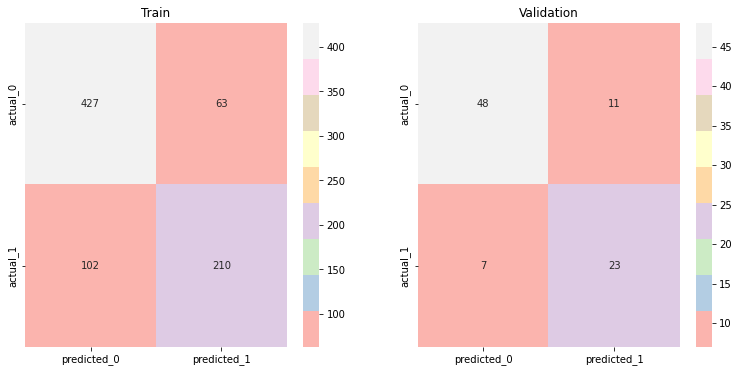

,Tarin,Validation
precision,0.769231,0.676471
recall,0.673077,0.766667
specificity,0.871429,0.813559
fpr,0.128571,0.186441
accuracy,0.794264,0.797753
f1,0.717949,0.718750
balanced accuracy,0.772253,0.790113


mean cv val score: 0.79
mean cv val loss 5.16
mean cv val score: 0.79
mean cv val loss 4.94


In [85]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features, t, bag_fold_model, k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

In [86]:
# get score with bootstrap bagging
bag_boot_model = BaggingClassifier(base_estimator=SGDClassifier(penalty='elasticnet', alpha=0.001), n_estimators=20, random_state=1, bootstrap=True).fit(X_selected_features, t)
print('Accuracy score for classification:')
print('bag_boot_model', bag_boot_model.score(X_selected_features, t).mean())

Accuracy score for classification:
bag_boot_model 0.7878787878787878


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

Confusion Matrix


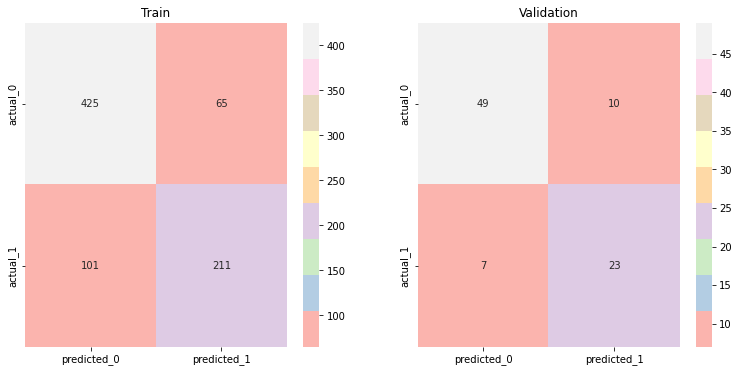

,Tarin,Validation
precision,0.764493,0.696970
recall,0.676282,0.766667
specificity,0.867347,0.830508
fpr,0.132653,0.169492
accuracy,0.793017,0.808989
f1,0.717687,0.730159
balanced accuracy,0.771814,0.798588


mean cv val score: 0.79
mean cv val loss 3.43
mean cv val score: 0.80
mean cv val loss 3.34


In [87]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features, t, bag_boot_model, k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

**Boosting**

In [88]:
# get score with ada boosting
ada_boost_model = AdaBoostClassifier(n_estimators=100, random_state=1).fit(X_selected_features, t)
print('Accuracy score for classification:')
print('ada_boost_model', ada_boost_model.score(X_selected_features, t).mean())

Accuracy score for classification:
ada_boost_model 0.8473625140291807


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

Confusion Matrix


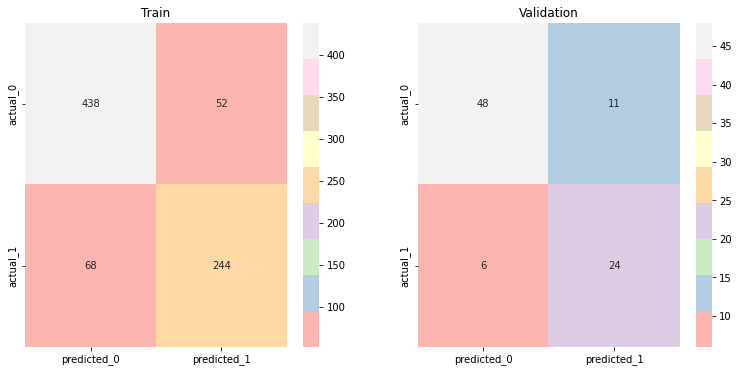

,Tarin,Validation
precision,0.824324,0.685714
recall,0.782051,0.800000
specificity,0.893878,0.813559
fpr,0.106122,0.186441
accuracy,0.850374,0.808989
f1,0.802632,0.738462
balanced accuracy,0.837964,0.806780


mean cv val score: 0.81
mean cv val loss 0.68
mean cv val score: 0.85
mean cv val loss 0.68


In [89]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features, t, ada_boost_model, k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

# KNN

In [98]:
# run KNN on the dataset and find best K by accuracy
hyper_parameters = {'n_neighbors': list(range(1, 20))}

gs_neigh_model = GridSearchCV(KNeighborsClassifier(), hyper_parameters).fit(X_selected_features, t)
print('Accuracy score for classification:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)

Accuracy score for classification:
gs_neigh_model 0.8204444165463561
best params {'n_neighbors': 5}


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

Confusion Matrix


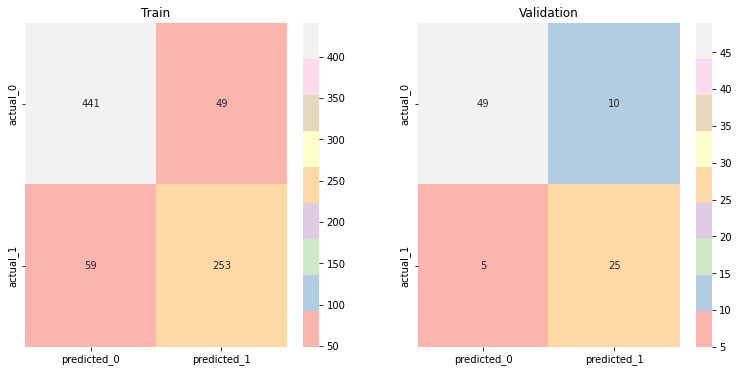

,Tarin,Validation
precision,0.837748,0.714286
recall,0.810897,0.833333
specificity,0.900000,0.830508
fpr,0.100000,0.169492
accuracy,0.865337,0.831461
f1,0.824104,0.769231
balanced accuracy,0.855449,0.831921


mean cv val score: 0.81
mean cv val loss 1.54
mean cv val score: 0.85
mean cv val loss 0.36


In [99]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features, t, gs_neigh_model, k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

# NBC (Naive Bayes)

In [92]:
# show score of nbc on the data
ct_nbc = ColumnTransformer([("scaling", MinMaxScaler(), numerical_cols)])
X_encoded_nbc = pd.DataFrame(ct_nbc.fit_transform(X_cp, t), columns=all_cols)

print('MultinomialNB score:', cross_val_score(MultinomialNB(), X_encoded_nbc, t, cv=15).mean())


MultinomialNB score: 0.690225988700565


**Results**

It can be seen from the models training that after we used Feature Selection we got 6 features only and then I used the best parameters from Grid Search for each models that i trained. The best model according to the cross validation and the accuracy is ada_boost_model so we will use this model for the prediction of the test.

# Test Classification

In [106]:
model = AdaBoostClassifier(n_estimators=100, random_state=1).fit(X_selected_features, t)

In [100]:
# test encoding
test_selected_features = test_cp[X_selected_features.columns]
test_numerical_cols = test_selected_features.select_dtypes(include=['int64', 'float64']).columns
test_categorical_cols = test_selected_features.select_dtypes(include=['object', 'bool']).columns
test_all_cols = list(test_categorical_cols) + list(test_numerical_cols)
ct_test_std = ColumnTransformer([("standard", StandardScaler(), test_numerical_cols)])
test_encoded = pd.DataFrame(ct_test_std.fit_transform(test_selected_features), columns=test_all_cols)

In [107]:
# predict the test by using ada_boost_model
submission_preds = model.predict(test_encoded)

In [108]:
# create the submission file
submission = pd.DataFrame({
        'PassengerId': submission_passengers_id,
        'Survived': submission_preds
    })
submission.to_csv('submission.csv', index=False)
display(submission)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Submissions and Leaderboard

**My Submissions**

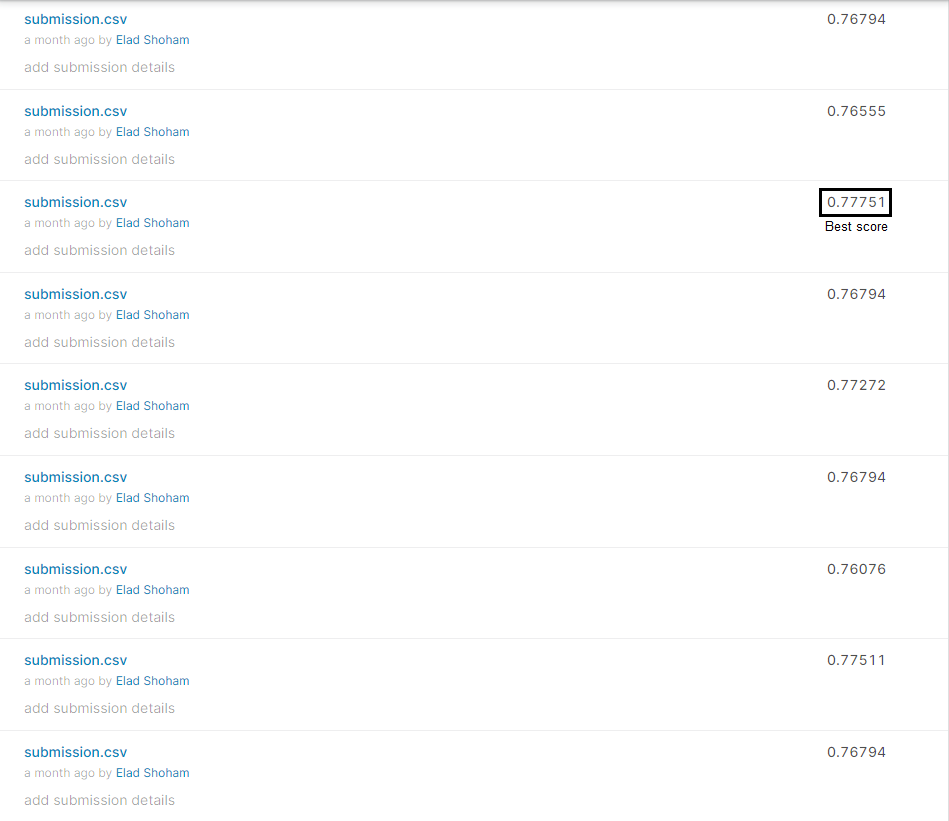

**Leaderboard**

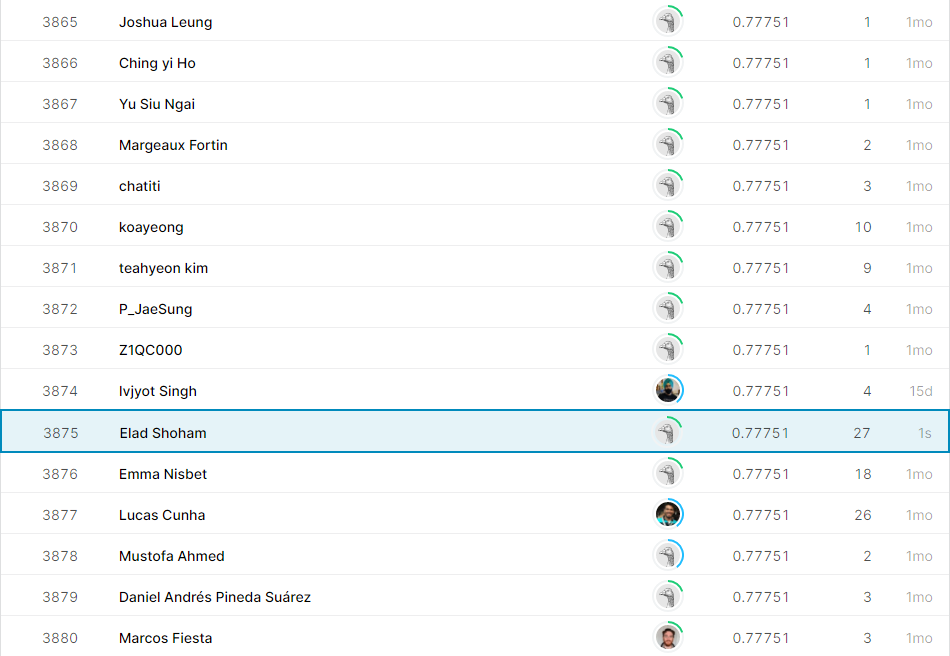

# Conclusions

After researching and analyzing the data in the previous exercise I found that adding the IsAlone feature helped with predictions so I preferred to continue training on the models with this data and since I used feature selection I could know that the IsAlone feature would disappear if it was not one of the features that was chosen. After running the feature selection I found that the best features and through them I trained a number of different models and performed cross validation on them to determine which of the models could best predict the test. After all the training the ada_boost_model model showed the best results so I used it to predict the test.

# References

sklrean Regression - https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

https://www.kaggle.com/startupsci/titanic-data-science-solutions